In [3]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as smf
import scipy.stats as stats

In [2]:
# Load the dataset
df_raw = pd.read_csv('newGMEwithtimezone.csv')

# Convert 'Date-Time' column to datetime format and set as index
df_raw['Date-Time'] = pd.to_datetime(df_raw['Date-Time'])
df_raw.set_index('Date-Time', inplace=True)

df_raw

,Unnamed: 0,#RIC,Domain,Type,Price,Volume,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,Exchange_Time,num_tick_direction
Date-Time,,,,,,,,,,,,,,
2021-01-04 09:30:01.669286370-05:00,0,GME.N,Market Price,Trade,19.0,69560.0,NaN,NaN,NaN,NaN,^,2021-01-04,09:30:01.669286370-05,1.0
2021-01-04 09:30:01.669286370-05:00,1,GME.N,Market Price,Trade,19.0,0.0,NaN,NaN,NaN,NaN,NaN,2021-01-04,09:30:01.669286370-05,NaN
2021-01-04 09:30:01.673284287-05:00,2,GME.N,Market Price,Quote,NaN,NaN,19.0,24.0,19.07,6.0,NaN,2021-01-04,09:30:01.673284287-05,NaN
2021-01-04 09:30:01.673284287-05:00,3,GME.N,Market Price,Quote,NaN,NaN,19.0,24.0,19.01,6.0,NaN,2021-01-04,09:30:01.673284287-05,NaN
2021-01-04 09:30:01.676587591-05:00,4,GME.N,Market Price,Quote,NaN,NaN,19.0,24.0,19.02,1.0,NaN,2021-01-04,09:30:01.676587591-05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:59:59.936339122-05:00,3495432,GME.N,Market Price,Quote,NaN,NaN,328.0,23.0,328.48,1.0,NaN,2021-01-29,15:59:59.936339122-05,NaN
2021-01-29 15:59:59.952164056-05:00,3495433,GME.N,Market Price,Quote,NaN,NaN,328.0,23.0,328.48,1.0,NaN,2021-01-29,15:59:59.952164056-05,NaN
2021-01-29 15:59:59.952164056-05:00,3495434,GME.N,Market Price,Trade,328.0,10.0,328.0,23.0,328.48,1.0,NaN,2021-01-29,15:59:59.952164056-05,NaN


In [3]:
# Shape of raw df
df_raw.shape

(3495437, 14)

In [4]:
# Data Cleaning

# Create a clean copy of the resample df
df_clean = df_raw.copy()

# Remove observations where transaction price is greater than ask price or where the quoted bid price > ask price
df_clean = df_clean[~(df_clean['Price'] > df_clean['Ask Price']) | (df_clean['Bid Price'] > df_clean['Ask Price'])].copy()

# Remove observations that occur before 9:30:00 and after 16:00:000
df_clean = df_clean.between_time('09:30:00', '16:00:00')

# Filter dataframe to only include trade observations and remove NaN from price, bid and ask
df_clean = df_clean[df_clean['Type'] == 'Trade']
df_clean.dropna(subset=['Price','Bid Price','Ask Price'], inplace=True)

# Drop rows where volume = 0
df_clean = df_clean.drop(df_clean.loc[df_clean['Volume'] == 0].index)

df_clean


,Unnamed: 0,#RIC,Domain,Type,Price,Volume,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,Exchange_Time,num_tick_direction
Date-Time,,,,,,,,,,,,,,
2021-01-04 09:30:01.676587591-05:00,5,GME.N,Market Price,Trade,19.01,25.0,19.0,24.0,19.02,1.0,NaN,2021-01-04,09:30:01.676587591-05,NaN
2021-01-04 09:30:02.752529040-05:00,8,GME.N,Market Price,Trade,19.04,20.0,19.0,24.0,19.06,1.0,NaN,2021-01-04,09:30:02.752529040-05,NaN
2021-01-04 09:30:03.784980999-05:00,9,GME.N,Market Price,Trade,19.05,2.0,19.0,24.0,19.06,1.0,NaN,2021-01-04,09:30:03.784980999-05,NaN
2021-01-04 09:30:04.792279959-05:00,11,GME.N,Market Price,Trade,19.05,49.0,19.0,22.0,19.06,1.0,NaN,2021-01-04,09:30:04.792279959-05,NaN
2021-01-04 09:30:04.792279959-05:00,12,GME.N,Market Price,Trade,19.06,100.0,19.0,22.0,19.06,1.0,^,2021-01-04,09:30:04.792279959-05,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:59:59.875667050-05:00,3495428,GME.N,Market Price,Trade,328.00,15.0,328.0,23.0,328.48,1.0,NaN,2021-01-29,15:59:59.875667050-05,NaN
2021-01-29 15:59:59.887567967-05:00,3495430,GME.N,Market Price,Trade,328.00,10.0,328.0,23.0,328.48,1.0,NaN,2021-01-29,15:59:59.887567967-05,NaN
2021-01-29 15:59:59.936339122-05:00,3495431,GME.N,Market Price,Trade,328.00,1.0,328.0,23.0,328.48,1.0,NaN,2021-01-29,15:59:59.936339122-05,NaN


In [5]:
# export file

# check if the file exists
if os.path.isfile('df_clean.csv'):
    # if the file exists, overwrite it
     df_clean.to_csv('df_clean.csv', index=True)
else:
     # if the file does not exist, create it
     df_clean.to_csv('df_clean.csv', index=True)

In [4]:
#read the csv file
df_clean = pd.read_csv('df_clean.csv',index_col=0, parse_dates=True)

# Shape of clean df
df_clean.shape

(1377843, 14)

In [7]:
df_clean

,Unnamed: 0,#RIC,Domain,Type,Price,Volume,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,Exchange_Time,num_tick_direction
Date-Time,,,,,,,,,,,,,,
2021-01-04 09:30:01.676587591-05:00,5,GME.N,Market Price,Trade,19.01,25.0,19.0,24.0,19.02,1.0,NaN,2021-01-04,09:30:01.676587591-05,NaN
2021-01-04 09:30:02.752529040-05:00,8,GME.N,Market Price,Trade,19.04,20.0,19.0,24.0,19.06,1.0,NaN,2021-01-04,09:30:02.752529040-05,NaN
2021-01-04 09:30:03.784980999-05:00,9,GME.N,Market Price,Trade,19.05,2.0,19.0,24.0,19.06,1.0,NaN,2021-01-04,09:30:03.784980999-05,NaN
2021-01-04 09:30:04.792279959-05:00,11,GME.N,Market Price,Trade,19.05,49.0,19.0,22.0,19.06,1.0,NaN,2021-01-04,09:30:04.792279959-05,NaN
2021-01-04 09:30:04.792279959-05:00,12,GME.N,Market Price,Trade,19.06,100.0,19.0,22.0,19.06,1.0,^,2021-01-04,09:30:04.792279959-05,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:59:59.875667050-05:00,3495428,GME.N,Market Price,Trade,328.00,15.0,328.0,23.0,328.48,1.0,NaN,2021-01-29,15:59:59.875667050-05,NaN
2021-01-29 15:59:59.887567967-05:00,3495430,GME.N,Market Price,Trade,328.00,10.0,328.0,23.0,328.48,1.0,NaN,2021-01-29,15:59:59.887567967-05,NaN
2021-01-29 15:59:59.936339122-05:00,3495431,GME.N,Market Price,Trade,328.00,1.0,328.0,23.0,328.48,1.0,NaN,2021-01-29,15:59:59.936339122-05,NaN


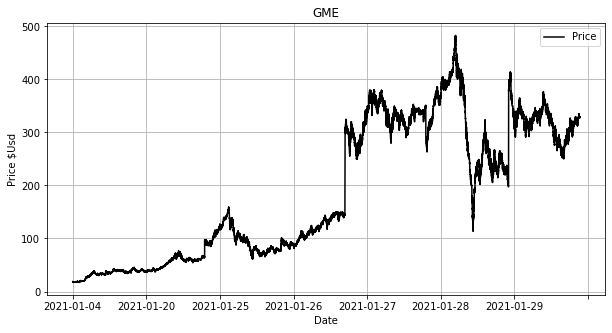

In [8]:
# Price plot using df_clean
df_clean.plot(kind='line',x='Date',y='Price',color='black',figsize= (10,5),grid=True)

# customize plot
plt.title('GME')
plt.xlabel('Date')
plt.ylabel('Price $Usd')
plt.show()

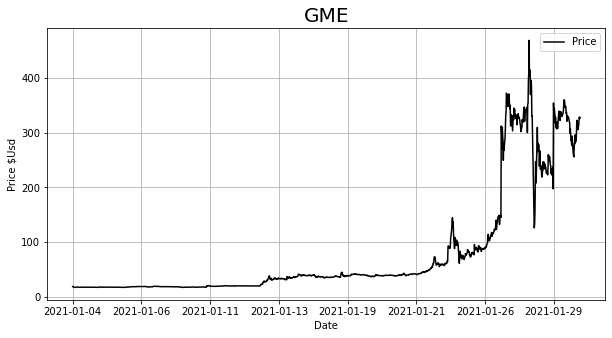

In [9]:
# Price plot using 5T interval

#Resample 
df_plot = df_clean.resample('5T').last()

#Drop NA so that the plot looks continuous
df_plot.dropna(subset=['Price'], inplace=True)

# plot 'Price' column as a line plot
df_plot.plot(kind='line',x='Date', y='Price', color='black', figsize= (10,5),grid=True)

# customize plot
plt.title('GME',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Price $Usd')
plt.show()

In [5]:
# Feature engineering

# Create a clean copy of the resample df
df_features = df_clean.copy()

# Drop columns we don't need
df_features  = df_features.drop(columns=['Unnamed: 0','Date','Type','Exchange_Time','#RIC', 'Domain', 'Tick Dir.'])

# #Include a categorical variable for trade size
df_features['trade_size'] = df_features['Volume'].apply(lambda x: 'micro' if x <= 200 else 'small' if x <= 500 else 'medium' if x <= 9999 else 'large')

#Convert to categorical data type
df_features['size_category'] = df_features['trade_size'].astype('category')

# Create dummy variables for the trade categories (excluding the base category 'large')
df_features = pd.get_dummies(df_features, columns=['size_category'], drop_first=True)

# Calculate the spread
df_features['spread'] = (df_features['Ask Price'] - df_features['Bid Price'])

# Calculate the midpoint of the bid-ask spread
df_features['midpoint_bid_ask'] = (df_features['Bid Price'] + df_features['Ask Price']) / 2

#Include variable for price pct change and its lag
df_features['pct_change'] = df_features['Price'].pct_change(periods=1)
df_features['pct_change_lag1'] = df_features['pct_change'].shift(1)

# Calculate the price change as the difference between the transaction price
# and the midpoint of the bid-ask spread just before the transaction
df_features['price_change'] = df_features['Price'] - df_features['midpoint_bid_ask']

# Calculate the price change per unit volume and its lag
df_features['p_change_vol'] = df_features['price_change'] / df_features['Volume']
df_features['p_change_vol_lag1'] = df_features['p_change_vol'].shift(1)

df_features = df_features.iloc[2:]


In [11]:
df_features 

,Price,Volume,Bid Price,Bid Size,Ask Price,Ask Size,num_tick_direction,trade_size,size_category_medium,size_category_micro,size_category_small,spread,midpoint_bid_ask,pct_change,pct_change_lag1,price_change,p_change_vol,p_change_vol_lag1
Date-Time,,,,,,,,,,,,,,,,,,
2021-01-04 09:30:03.784980999-05:00,19.05,2.0,19.00,24.0,19.06,1.0,NaN,micro,0,1,0,0.06,19.030,0.000525,0.001578,0.020,0.010000,0.000500
2021-01-04 09:30:04.792279959-05:00,19.05,49.0,19.00,22.0,19.06,1.0,NaN,micro,0,1,0,0.06,19.030,0.000000,0.000525,0.020,0.000408,0.010000
2021-01-04 09:30:04.792279959-05:00,19.06,100.0,19.00,22.0,19.06,1.0,1.0,micro,0,1,0,0.06,19.030,0.000525,0.000000,0.030,0.000300,0.000408
2021-01-04 09:30:05.240585844-05:00,19.07,200.0,19.01,1.0,19.10,1.0,1.0,micro,0,1,0,0.09,19.055,0.000525,0.000525,0.015,0.000075,0.000300
2021-01-04 09:30:06.896485617-05:00,19.10,85.0,19.04,2.0,19.10,1.0,NaN,micro,0,1,0,0.06,19.070,0.001573,0.000525,0.030,0.000353,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:59:59.875667050-05:00,328.00,15.0,328.00,23.0,328.48,1.0,NaN,micro,0,1,0,0.48,328.240,0.000000,-0.000061,-0.240,-0.016000,-0.016000
2021-01-29 15:59:59.887567967-05:00,328.00,10.0,328.00,23.0,328.48,1.0,NaN,micro,0,1,0,0.48,328.240,0.000000,0.000000,-0.240,-0.024000,-0.016000
2021-01-29 15:59:59.936339122-05:00,328.00,1.0,328.00,23.0,328.48,1.0,NaN,micro,0,1,0,0.48,328.240,0.000000,0.000000,-0.240,-0.240000,-0.024000


In [12]:
# Shape of the features df
df_features.shape

(1377841, 18)

In [6]:
# Resample DF

interval = '5S'

# Group the dataframe by 'trade_size'
grouped = df_features.groupby('trade_size')

# Define a custom aggregation function to calculate the sum of the 'Volume' within each group and resample interval
def volume_sum(group):
    return group.resample(interval)['Volume'].sum()

# Apply the custom aggregation function to each group
volume_sum_by_trade_size = {trade_size: volume_sum(group) for trade_size, group in grouped}

# Combine the resulting series into a dataframe
volume_sum_df = pd.concat(volume_sum_by_trade_size, axis=1)

# Find the most representative 'trade_size' category based on the sum of the 'Volume' within each interval
most_representative_trade_size = volume_sum_df.idxmax(axis=1)

# Create a new dataframe to store the resampled data
df_resample = pd.DataFrame(index=df_features.resample(interval).mean().index)
df_resample['trade_size'] = most_representative_trade_size

# Calculate the mean values of the numeric columns for the most representative 'trade_size' category
for trade_size, group in grouped:
    resampled_group = group.resample(interval).agg({col: 'mean' for col in group.select_dtypes(include=['number']).columns})
    mask = (most_representative_trade_size == trade_size)
    df_resample.loc[mask, resampled_group.columns] = resampled_group.loc[mask]

# Drop NA 
df_resample.dropna(subset=['Price'], inplace=True)

# Calculate the future midquote
df_resample['midpoint_future'] = df_resample['midpoint_bid_ask'].shift(-1)

# Calculate the Simple Price Impact (SPI)
df_resample['simple_price_impact'] = (df_resample['midpoint_future'] - df_resample['midpoint_bid_ask']) / df_resample['midpoint_bid_ask']
df_resample.dropna(subset=['simple_price_impact'], inplace=True)


In [14]:
df_resample

,trade_size,Price,Volume,Bid Price,Bid Size,Ask Price,Ask Size,num_tick_direction,size_category_medium,size_category_micro,size_category_small,spread,midpoint_bid_ask,pct_change,pct_change_lag1,price_change,p_change_vol,p_change_vol_lag1,midpoint_future,simple_price_impact
Date-Time,,,,,,,,,,,,,,,,,,,,
2021-01-04 09:30:00-05:00,micro,19.053333,50.333333,19.000000,22.666667,19.060000,1.000000,1.000000,0.0,1.0,0.0,0.060000,19.030000,0.000350,7.011090e-04,0.023333,0.003569,0.003636,19.062500,0.001708
2021-01-04 09:30:05-05:00,micro,19.085000,142.500000,19.025000,1.500000,19.100000,1.000000,1.000000,0.0,1.0,0.0,0.075000,19.062500,0.001049,5.247967e-04,0.022500,0.000214,0.000187,19.051000,-0.000603
2021-01-04 09:30:15-05:00,micro,19.044000,101.600000,19.000000,23.000000,19.102000,31.000000,-0.500000,0.0,1.0,0.0,0.102000,19.051000,-0.000418,-6.292626e-04,-0.007000,-0.000980,-0.000939,19.035000,-0.000840
2021-01-04 09:30:30-05:00,micro,19.050000,100.000000,19.010000,1.000000,19.060000,1.000000,-1.000000,0.0,1.0,0.0,0.050000,19.035000,-0.000525,2.630195e-03,0.015000,0.000150,0.000150,19.025000,-0.000525
2021-01-04 09:30:50-05:00,micro,19.030000,53.000000,19.000000,17.000000,19.050000,1.000000,NaN,0.0,1.0,0.0,0.050000,19.025000,-0.001050,-5.246590e-04,0.005000,0.000094,0.000150,19.015000,-0.000526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:59:30-05:00,micro,328.558189,18.173469,328.371122,16.566327,328.827806,162.831633,-0.333333,0.0,1.0,0.0,0.456684,328.599464,-0.000006,-8.965307e-06,-0.041276,-0.008711,-0.008999,328.505000,-0.000287
2021-01-29 15:59:35-05:00,medium,328.975000,4165.000000,328.010000,4.000000,329.000000,318.000000,1.000000,1.0,0.0,0.0,0.990000,328.505000,0.000091,1.064190e-04,0.470000,0.000335,0.001071,328.475393,-0.000090
2021-01-29 15:59:40-05:00,micro,328.481679,16.428571,328.211714,11.435714,328.739071,1.428571,-0.111111,0.0,1.0,0.0,0.527357,328.475393,0.000016,1.048796e-05,0.006286,0.012578,0.012479,328.619044,0.000437


In [15]:
# Divide it into three periods (df_features)
min_date = df_features.index.min()
max_date = df_features.index.max()

period_length = (max_date - min_date) / 3

period1_start = min_date
period1_end = period1_start + period_length

period2_start = period1_end
period2_end = period2_start + period_length

period3_start = period2_end
period3_end = max_date

# Step 2: Filter the DataFrame for each period
df_period1 = df_features[(df_features.index >= period1_start) & (df_features.index < period1_end)]
df_period2 = df_features[(df_features.index >= period2_start) & (df_features.index < period2_end)]
df_period3 = df_features[(df_features.index >= period3_start) & (df_features.index <= period3_end)]


In [7]:
# Divide it into three periods (df_resample)
min_date = df_resample.index.min()
max_date = df_resample.index.max()

period_length = (max_date - min_date) / 3

period1_start = min_date
period1_end = period1_start + period_length

period2_start = period1_end
period2_end = period2_start + period_length

period3_start = period2_end
period3_end = max_date

# Step 2: Filter the DataFrame for each period
df_period1 = df_resample[(df_resample.index >= period1_start) & (df_resample.index < period1_end)]
df_period2 = df_resample[(df_resample.index >= period2_start) & (df_resample.index < period2_end)]
df_period3 = df_resample[(df_resample.index >= period3_start) & (df_resample.index <= period3_end)]

In [17]:
# Cumulative price change, trades, and volume by trade sizes

# Store dataframes in a dictionary
period_dataframes = {
    1: df_period1,
    2: df_period2,
    3: df_period3
}

# Set the desired period
period = 3

# Select the dataframe for the specified period
period_df = period_dataframes[period]

# Calculate the number of trades for each trade size
num_trades = period_df['trade_size'].value_counts()

# Calculate the total volume for each trade size
total_volume = period_df.groupby('trade_size')['Volume'].sum()

# Calculate the percentage of volume for each trade size
volume_pct = total_volume / total_volume.sum() * 100

# Calculate the cumulative price change for each trade size category:
cumulative_price_changes = period_df.groupby('trade_size')['price_change'].sum() * 100

# Calculate the total cumulative price change
total_cumulative_price_change = period_df['price_change'].sum()

# Calculate the proportion of cumulative price change associated with trades in each size category
pct_cumulative_price_change = cumulative_price_changes / total_cumulative_price_change

# Calculate the proportion of trades in each size category:
trades_pct = period_df['trade_size'].value_counts(normalize=True) * 100

# Combine the results into a DataFrame
comparison = pd.DataFrame({'pct_cumulative_price_change': pct_cumulative_price_change, 
                        'trades_pct': trades_pct, 
                        'num_trades': num_trades,
                        'total_volume': total_volume,
                        'volume_pct': volume_pct})

# Display results
sorted_index = ['micro', 'small', 'medium', 'large']
comparison = comparison.reindex(sorted_index)
comparison


,pct_cumulative_price_change,trades_pct,num_trades,total_volume,volume_pct
micro,74.819574,83.365019,23679,1.067663e+06,10.225880
small,9.113728,5.569638,1582,5.432965e+05,5.203592
medium,19.921465,10.463315,2972,4.853127e+06,46.482334
large,-3.854767,0.602028,171,3.976712e+06,38.088195


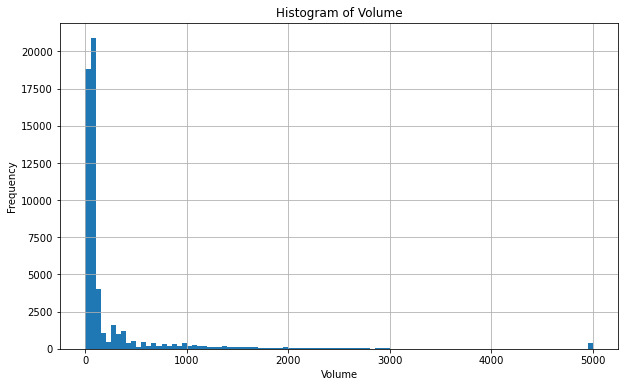

In [20]:
# Volume histogram using resampled df
clipped_vol = df_resample['Volume'].clip(lower=0, upper=5000)

# create a larger figure with a width of 10 inches and a height of 6 inches
plt.figure(figsize=(10, 6))

# plot a histogram of the clipped data in column 'Volume'
clipped_vol.hist(bins=100)

# add labels and title to the plot
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Volume')

# display the plot
plt.show()


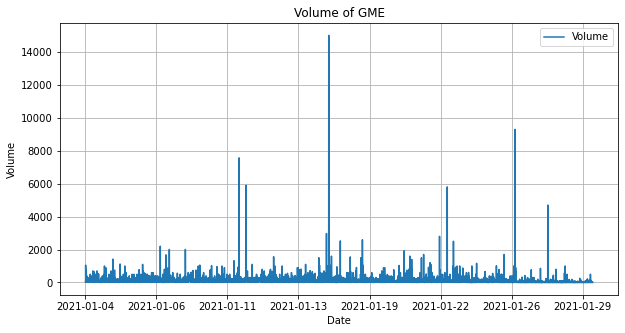

In [21]:
# Plot Volume using 1S interval
df_plot = df_clean.resample('1T').last()

#Drop NA so that the plot looks continuous
df_plot.dropna(subset=['Volume'], inplace=True)

# plot 'Volume' using resample df
df_plot.plot(kind='line',x='Date', y='Volume', figsize=(10,5))

# customize plot
plt.title('Volume of GME')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [22]:
# Pairwise t-tests using df_features

# Group the data by trade size
groups = df_features.groupby('trade_size')

# Conduct pairwise t-tests
results = []
categories = ['micro','small', 'medium', 'large']
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        cat1 = categories[i]
        cat2 = categories[j]
        price_changes_cat1 = groups.get_group(cat1)['price_change']
        price_changes_cat2 = groups.get_group(cat2)['price_change']
        
        # Perform the two-tailed t-test
        t_stat, p_value = ttest_ind(price_changes_cat1, price_changes_cat2)
        
        results.append({
            'Category 1': cat1,
            'Category 2': cat2,
            't_stat': t_stat,
            'p_value': p_value
        })

# Display the results in a DataFrame
results_df = pd.DataFrame(results)
results_df 

,Category 1,Category 2,t_stat,p_value
0,micro,small,-8.298135,1.058538e-16
1,micro,medium,-5.576186,2.458976e-08
2,micro,large,-4.166170,3.097796e-05
3,small,medium,0.030716,9.754965e-01
4,small,large,-5.549849,2.870600e-08
5,medium,large,-5.523939,3.343584e-08


/Users/Nico/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


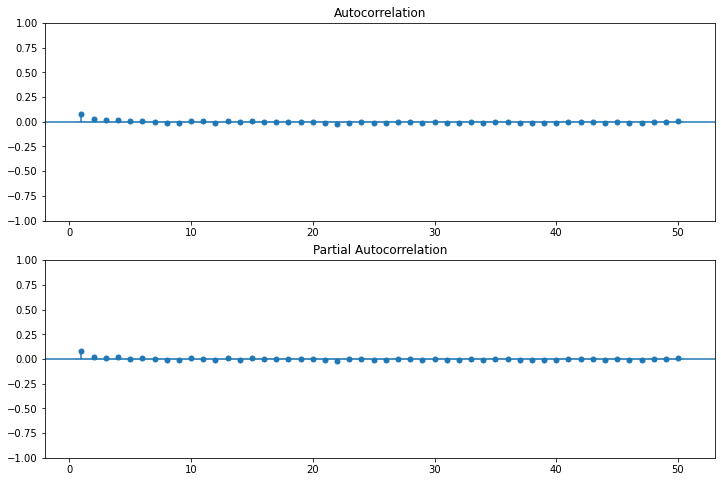

In [23]:
# Autocorrelation and partial autocorrelation plots for 'simple_price_impact'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df_resample['simple_price_impact'].dropna(), lags=50, zero=False, ax=ax1)
plot_pacf(df_resample['simple_price_impact'].dropna(), lags=50, zero=False, ax=ax2)

plt.show()

In [24]:
# Calculate the PACF values for 'simple_price_impact'
pacf_values = pacf(df_resample['simple_price_impact'].dropna(), nlags=10)

# Calculate the significance threshold
significance_level = 1.96 / np.sqrt(len(df_resample['simple_price_impact'].dropna()))

# Find the number of lags where the PACF values are above the significance threshold
ar_order = np.sum(np.abs(pacf_values) > significance_level) - 1

print("The order of the AR component (p) is:", ar_order)

The order of the AR component (p) is: 6


In [25]:
# Calculate the PACF values for 'pct_change'
pacf_values = pacf(df_resample['pct_change'].dropna(), nlags=10)

# Calculate the significance threshold
significance_level = 1.96 / np.sqrt(len(df_resample['pct_change'].dropna()))

# Find the number of lags where the PACF values are above the significance threshold
ar_order = np.sum(np.abs(pacf_values) > significance_level) - 1

print("The order of the AR component (p) is:", ar_order)

The order of the AR component (p) is: 3


In [26]:
# Regression with 'simple_price_impact' as dependant variable within each period
formula = 'simple_price_impact ~ size_category_micro + size_category_small + size_category_medium + spread + pct_change'

models = {}  # Store the models in a dictionary
models['period1'] = smf.ols(formula, data=df_period1).fit()
models['period2'] = smf.ols(formula, data=df_period2).fit()
models['period3'] = smf.ols(formula, data=df_period3).fit()

period = 3

# Print the results
print(models[f'period{period}'].summary())

                             OLS Regression Results                            
Dep. Variable:     simple_price_impact   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.006
Method:                  Least Squares   F-statistic:                     37.34
Date:                 Mon, 10 Apr 2023   Prob (F-statistic):           2.66e-38
Time:                         12:46:54   Log-Likelihood:                 89506.
No. Observations:                28404   AIC:                        -1.790e+05
Df Residuals:                    28398   BIC:                        -1.790e+05
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

In [8]:
import statsmodels.formula.api as smf

# Regression with 'simple_price_impact' as the dependent variable within each period
formula = 'simple_price_impact ~ size_category_micro + size_category_small + size_category_medium + spread + pct_change'

models = {}  # Store the models in a dictionary

# First, fit OLS models to obtain residuals
ols_models = {}
ols_models['period1'] = smf.ols(formula, data=df_period1).fit()
ols_models['period2'] = smf.ols(formula, data=df_period2).fit()
ols_models['period3'] = smf.ols(formula, data=df_period3).fit()

# Compute weights as the inverse of squared residuals
df_period1['weights'] = 1 / ols_models['period1'].resid**2
df_period2['weights'] = 1 / ols_models['period2'].resid**2
df_period3['weights'] = 1 / ols_models['period3'].resid**2

# Fit WLS models using the computed weights
models['period1'] = smf.wls(formula, data=df_period1, weights=df_period1['weights']).fit()
models['period2'] = smf.wls(formula, data=df_period2, weights=df_period2['weights']).fit()
models['period3'] = smf.wls(formula, data=df_period3, weights=df_period3['weights']).fit()

period = 3

# Print the results
print(models[f'period{period}'].summary())

                             WLS Regression Results                            
Dep. Variable:     simple_price_impact   R-squared:                       1.000
Model:                             WLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 9.370e+08
Date:                 Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                         16:37:02   Log-Likelihood:             1.4603e+05
No. Observations:                28404   AIC:                        -2.921e+05
Df Residuals:                    28398   BIC:                        -2.920e+05
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

/var/folders/zn/fhbk05j11q5854v0j9xqfxt00000gn/T/ipykernel_4310/1328497088.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period1['weights'] = 1 / ols_models['period1'].resid**2
/var/folders/zn/fhbk05j11q5854v0j9xqfxt00000gn/T/ipykernel_4310/1328497088.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period2['weights'] = 1 / ols_models['period2'].resid**2
/var/folders/zn/fhbk05j11q5854v0j9xqfxt00000gn/T/ipykernel_4310/1328497088.py:17: SettingWithCopyWarning: 
A value is trying to be set on 

In [27]:
# Multicollinearity test

# Prepare the data
X = df_period3[['size_category_micro', 'size_category_small', 'size_category_medium', 'spread', 'pct_change']]
# X = df_period3[['size_category_micro', 'spread', 'pct_change']]
X = sm.add_constant(X)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

               variable         vif
0                 const  166.442437
1   size_category_micro   23.225595
2   size_category_small    9.682374
3  size_category_medium   16.459231
4                spread    1.031599
5            pct_change    1.000520
